In [3]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [5]:
rv = joblib.load(os.path.join("..","..", "data","JS_05_reviews.pkl"))

In [6]:
rv.shape

(4139856, 24)

In [13]:
rv.head()

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,place.id,place.name,place.category,place.categoryCode,place.categoryCodes,place.phone,place.address,place.__typename,isseoul,media_count
0,5.0,,7,1,None,published,[],5ece9c57d9c7500011a2c500,Review,4TXey,...,3.67281e+07,초앤유여성병원,산부인과,223245.0,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,NaN,NaN
1,5.0,,6,1,None,published,[],5ece9c31ab6fc50010db215f,Review,4TXey,...,3.67281e+07,초앤유여성병원,산부인과,223245.0,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,NaN,NaN
2,4.0,,144,1,None,published,[],5ecaa2fa0387560010bed9d3,Review,4TXey,...,1.90223e+09,산들할인마트,"슈퍼,마트-일반",223850.0,"[223563, 223564, 223593, 223850]",02-889-9142,서울특별시 관악구 봉천동 698-3,Place,NaN,NaN
3,5.0,,2,1,None,published,[],5ece9c68d9c7500011a2c50d,Review,4TXey,...,1.78685e+09,계산홈마트,"슈퍼,마트-일반",223850.0,"[223563, 223564, 223593, 223850]",032-543-9775,인천광역시 계양구 계산동 945-3 지하,Place,NaN,NaN
4,5.0,,4,1,None,published,[],5eca257b0387560010bdadca,Review,4TXey,...,3.76428e+07,빽다방 부천중동현대점,빽다방,229808.0,"[220036, 220052, 220577, 229808]",032-327-3777,경기도 부천시 중동 1167-3 파크리움 103호,Place,NaN,NaN


In [7]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4139856 entries, 0 to 1809173
Data columns (total 24 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   rating                       float64
 1   body                         object 
 2   visitCount                   int64  
 3   viewCount                    int64  
 4   thumbnail                    object 
 5   status                       object 
 6   media                        object 
 7   id                           object 
 8   __typename                   object 
 9   idno                         object 
 10  visitedDate.date             object 
 11  visitedDate.displayDate      object 
 12  visitedDate.displayDateTime  object 
 13  visitedDate.__typename       object 
 14  place.id                     object 
 15  place.name                   object 
 16  place.category               object 
 17  place.categoryCode           float64
 18  place.categoryCodes          object 
 19  

In [9]:
# 총 36793명의 user
rv['idno'].nunique()

36793

In [10]:
# user 당 리뷰 개수
rv['idno'].value_counts()

6wKan    2797
1LMMA    2666
KALK     2609
2vzdR    2489
1MruI    2455
         ... 
2c7sx       1
2eFD6       1
1qrWD       1
2zkkc       1
2tDs5       1
Name: idno, Length: 36793, dtype: int64

In [12]:
# 리뷰 개수 1개인 user 1466명
(rv['idno'].value_counts() == 1).sum()

1466

# 결측값, 데이터타입

In [28]:
rv = rv.reset_index(drop = True)

In [42]:
rv = rv.fillna('none')

In [43]:
rv.head()

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,place.id,place.name,place.category,place.categoryCode,place.categoryCodes,place.phone,place.address,place.__typename,isseoul,media_count
0,5.0,,7,1,none,published,[],5ece9c57d9c7500011a2c500,Review,4TXey,...,3.67281e+07,초앤유여성병원,산부인과,223245,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,0,none
1,5.0,,6,1,none,published,[],5ece9c31ab6fc50010db215f,Review,4TXey,...,3.67281e+07,초앤유여성병원,산부인과,223245,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,0,none
2,4.0,,144,1,none,published,[],5ecaa2fa0387560010bed9d3,Review,4TXey,...,1.90223e+09,산들할인마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",02-889-9142,서울특별시 관악구 봉천동 698-3,Place,1,none
3,5.0,,2,1,none,published,[],5ece9c68d9c7500011a2c50d,Review,4TXey,...,1.78685e+09,계산홈마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",032-543-9775,인천광역시 계양구 계산동 945-3 지하,Place,0,none
4,5.0,,4,1,none,published,[],5eca257b0387560010bdadca,Review,4TXey,...,3.76428e+07,빽다방 부천중동현대점,빽다방,229808,"[220036, 220052, 220577, 229808]",032-327-3777,경기도 부천시 중동 1167-3 파크리움 103호,Place,0,none


In [49]:
value = []
for elem in rv['place.id']:
    try:
        elem = int(elem)
    except:
        elem = elem
    value.append(elem)

In [52]:
rv['place.id'] = value

In [53]:
value = []
for elem in rv['place.categoryCode']:
    try:
        elem = int(elem)
    except:
        elem = elem
    value.append(elem)

In [54]:
rv['place.categoryCode'] = value

In [55]:
rv.head()

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,place.id,place.name,place.category,place.categoryCode,place.categoryCodes,place.phone,place.address,place.__typename,isseoul,media_count
0,5.0,,7,1,none,published,[],5ece9c57d9c7500011a2c500,Review,4TXey,...,36728052,초앤유여성병원,산부인과,223245,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,0,none
1,5.0,,6,1,none,published,[],5ece9c31ab6fc50010db215f,Review,4TXey,...,36728052,초앤유여성병원,산부인과,223245,"[223175, 223176, 223187, 223245]",1588-1789,경기도 부천시 중동 1151-6,Place,0,none
2,4.0,,144,1,none,published,[],5ecaa2fa0387560010bed9d3,Review,4TXey,...,1902233431,산들할인마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",02-889-9142,서울특별시 관악구 봉천동 698-3,Place,1,none
3,5.0,,2,1,none,published,[],5ece9c68d9c7500011a2c50d,Review,4TXey,...,1786854862,계산홈마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",032-543-9775,인천광역시 계양구 계산동 945-3 지하,Place,0,none
4,5.0,,4,1,none,published,[],5eca257b0387560010bdadca,Review,4TXey,...,37642806,빽다방 부천중동현대점,빽다방,229808,"[220036, 220052, 220577, 229808]",032-327-3777,경기도 부천시 중동 1167-3 파크리움 103호,Place,0,none


In [57]:
rv['place.id'] = rv['place.id'].astype(str)
rv['place.categoryCode'] = rv['place.categoryCode'].astype(str)

In [172]:
joblib.dump(rv, os.path.join("..","..", "data",'JS_05_reviews.pkl'))

['../../data/JS_05_reviews.pkl']

# 서울특별시 place

In [58]:
# 서울특별시 내 place
rv['place.address'] = rv['place.address'].fillna('none')
rv['isseoul'] = rv['place.address'].apply(lambda x : 1 if '서울' in x else 0)

In [59]:
rv_sel = rv.loc[rv['isseoul'] == 1]

In [60]:
# 서울 place 리뷰 개수 2백30만개
rv_sel.shape

(2314467, 24)

In [61]:
# 서울 place user 36394명
rv_sel['idno'].nunique()

36394

In [62]:
# 리뷰 개수 1개인 user 2479명
(rv_sel['idno'].value_counts() == 1).sum()

2479

In [63]:
rv_sel['idno'].value_counts()

KALK     2354
1MruI    2052
8ftE3    2040
2itGn    1974
4zUtN    1963
         ... 
4ABrw       1
90oMP       1
f1Zu        1
hn2F        1
3iKWw       1
Name: idno, Length: 36394, dtype: int64

In [64]:
rv_sel.head()

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,place.id,place.name,place.category,place.categoryCode,place.categoryCodes,place.phone,place.address,place.__typename,isseoul,media_count
2,4.0,,144,1,none,published,[],5ecaa2fa0387560010bed9d3,Review,4TXey,...,1902233431,산들할인마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",02-889-9142,서울특별시 관악구 봉천동 698-3,Place,1,none
10,4.5,,2,1,none,published,[],5ec7ec658160f100109a8368,Review,4TXey,...,1150710065,스타벅스 보라매공원R점,스타벅스,221275,"[220036, 220052, 220576, 221275]",1522-3232,"서울특별시 동작구 신대방동 395-65 파크스퀘어,보라매현대APT",Place,1,none
11,5.0,,3,1,none,published,[],5ecbe8b1b39a2500115d1dcc,Review,4TXey,...,1287040263,유가네한우곰탕 본사직영점,유가네한우곰탕,1000595,"[220036, 220037, 220069, 1000595]",02-821-5050,서울특별시 동작구 상도3동 323-4,Place,1,none
12,5.0,,115,1,none,published,[],5ecbe8a1ab6fc50010d6fdfe,Review,4TXey,...,1125542597,에스엠할인마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",,서울특별시 동작구 신대방동 395-69,Place,1,none
19,5.0,,145,0,none,published,[],5ecbe8e0a437330010b07268,Review,4TXey,...,1902233431,산들할인마트,"슈퍼,마트-일반",223850,"[223563, 223564, 223593, 223850]",02-889-9142,서울특별시 관악구 봉천동 698-3,Place,1,none


In [68]:
# 서울 내 place개수 215157개
rv_sel['place.id'].value_counts()

21413530      3888
12199762      1869
18926668      1791
12134145      1749
13318581      1710
              ... 
21086003         1
18012844         1
33889972         1
1982630959       1
18182443         1
Name: place.id, Length: 215157, dtype: int64

In [72]:
# 리뷰개수가 100개 이상인 place는 2669개
(rv_sel['place.id'].value_counts() > 100).sum()

2669

In [126]:
# 서울 place별 group

In [81]:
# 각 place의 리뷰 개수
rv_sel.groupby('place.id')['id'].count().reset_index().sort_values('id', ascending = False)

,place.id,id
144352,21413530,3888
32376,12199762,1869
116065,18926668,1791
31548,12134145,1749
51341,13318581,1710
...,...,...
148931,31011961,178
180624,36943358,178
85619,1686439439,178
150970,31347050,178


In [114]:
temp = rv_sel.groupby('place.id')['id'].count().reset_index().sort_values('id', ascending = False)

In [ ]:
# 각 place가 속한 place.category
temp['place.category'] = rv_sel.groupby('place.id')['place.category'].max().reset_index()['place.category']

In [117]:
temp.columns = ['place.id', 'review.count', 'place.category']
temp.head()

,place.id,review.count,place.category
144352,21413530,3888,다이소
32376,12199762,1869,이마트
116065,18926668,1791,NC백화점
31548,12134145,1749,신세계백화점
51341,13318581,1710,이마트


In [118]:
# 각 place의 한글명
temp['place.name'] = rv_sel.groupby('place.id')['place.name'].max().reset_index()['place.name']

In [152]:
# 각 카테고리에 속한 
rv_sel.groupby('place.category')['place.id'].nunique().reset_index().sort_values('place.id', ascending = False)

,place.category,place.id
5904,한식-일반,10001
5043,"카페,디저트-일반",7789
3464,약국-일반,4883
5044,카페-일반,4418
2038,미용실-일반,4047
...,...,...
3413,압구정꼬치1991,1
3405,알리바바쏙쏙김밥,1
3402,알로하테이블,1
3400,알렉스더커피,1


In [145]:
# 서울 place 리뷰 개수순 
temp.head(20)

,place.id,review.count,place.category,place.name
144352,21413530,3888,다이소,아성다이소
32376,12199762,1869,이마트,이마트 자양점
116065,18926668,1791,NC백화점,NC백화점 강서점
31548,12134145,1749,신세계백화점,신세계백화점 강남점
51341,13318581,1710,이마트,이마트 왕십리점
18426,11604995,1685,이마트,이마트가양점
17804,11583106,1474,뉴코아아울렛,뉴코아아울렛 강남점
48545,13184270,1446,이마트,이마트 영등포점
61349,1396493334,1424,이마트트레이더스,이마트트레이더스 월계점
31003,12101490,1335,현대백화점,현대백화점디큐브시티점


In [148]:
# 서울 place 카테고리별 개수순 (카테고리에 포함된 place 개수)
temp['place.category'].value_counts().head(20)

한식-일반         9978
카페,디저트-일반     7648
약국-일반         4881
카페-일반         4400
미용실-일반        4030
중식당-일반        3735
육류,고기요리-일반    3350
슈퍼,마트-일반      3047
GS25          2990
치과-일반         2676
CU            2564
기업-일반         2353
베이커리-일반       2328
맥주,호프-일반      2130
종합분식          2123
일식당-일반        2121
정육점-일반        1863
치킨,닭강정-일반     1849
세븐일레븐         1807
한의원-일반        1569
Name: place.category, dtype: int64

In [182]:
rv.loc[rv['place.name'].str.contains('족발')].head()

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,place.id,place.name,place.category,place.categoryCode,place.categoryCodes,place.phone,place.address,place.__typename,isseoul,media_count
182,5.0,,2,1,none,published,[],5e91e631280c540010487ca6,Review,4TXey,...,13269484,노다지평양족발보쌈,"족발,보쌈-일반",221504,"[220036, 220037, 220075, 220766, 221504]",02-2278-0557,서울특별시 중구 쌍림동 245-1,Place,1,none
234,5.0,,1,1,none,published,[],5e8099ef93a0ca00115faf00,Review,4TXey,...,1114549614,옥천족발,"족발,보쌈-일반",221504,"[220036, 220037, 220075, 220766, 221504]",032-666-0706,경기도 부천시 상동 237-52,Place,0,none
279,5.0,,1,1,none,published,[],5e8372ac280c5400103b44ea,Review,4TXey,...,13269484,노다지평양족발보쌈,"족발,보쌈-일반",221504,"[220036, 220037, 220075, 220766, 221504]",02-2278-0557,서울특별시 중구 쌍림동 245-1,Place,1,none
1982,5.0,none,1,0,none,published,[],5cc99dd8a175848462ea87e6,Review,4TXey,...,37492240,불화덕족발,"족발,보쌈-일반",221504,"[220036, 220037, 220075, 220766, 221504]",none,서울특별시 동작구 상도로 136 일신빌딩,Place,1,none
2904,5.0,맥주도,1,0,none,published,[],5dfe2ecd3621d10011bfb4b9,Review,2Ltuw,...,1007028772,맛있는족발,"족발,보쌈-일반",221504,"[220036, 220037, 220075, 220766, 221504]",,경기도 수원시 팔달구 지동 307-20,Place,0,none


In [121]:
# 가장 많은 '한식-일반' 에 속한 place들
temp.loc[temp['place.category'] == '한식-일반'].head(20)

,place.id,review.count,place.category,place.name
130830,1976902967,221,한식-일반,플레이보6 김포공항점
17386,11569605,195,한식-일반,삼청동수제비
98332,1810277002,170,한식-일반,몽탄
79657,1616173500,148,한식-일반,쿠팡
20574,11679660,137,한식-일반,진주회관
55353,13475534,137,한식-일반,공단분식
82530,1650205084,136,한식-일반,우리동네
89244,1731806901,133,한식-일반,아산병원푸드코트
46971,1315482770,127,한식-일반,푸르네마트
144393,21427490,117,한식-일반,오복함흥냉면


In [122]:
# '한식-일반' 에 속하여있는 place들의 리뷰 총 개수 69833개
# 즉, 9978개에서 69833개의 review는 place 당 평균 리뷰가 10개도 안된다는 말
temp.loc[temp['place.category'] == '한식-일반', 'review.count'].sum()

69833

# 0607

In [4]:
rv = joblib.load(os.path.join("..","..", "data","JS_05_reviews.pkl"))

In [10]:
rv['place.address'] = rv['place.address'].apply(lambda x: 'none' if x == '' else x)

In [11]:
rv['isseoul'] = rv['place.address'].apply(lambda x: 1 if '서울' in x.split()[0] else 0)

In [12]:
# 서울 place 개수, 서울이 아닌 place 개수
rv['isseoul'].value_counts()

1    2313253
0    1826603
Name: isseoul, dtype: int64

In [16]:
# 서울 지역 place
rv_sel = rv.loc[rv['isseoul'] == 1]

In [112]:
df = rv_sel.groupby('place.id')['id'].count().reset_index()

In [113]:
df['place.name'] = rv_sel.groupby('place.id')['place.name'].max().reset_index()['place.name']

In [114]:
df['place.category'] = rv_sel.groupby('place.id')['place.category'].max().reset_index()['place.category']

In [115]:
df

,place.id,id,place.name,place.category
0,1000008735,3,마산아구찜,"아귀찜,해물찜-일반"
1,1000020305,10,크림데이,케이크전문-일반
2,1000021772,17,머킹의 로얄가든,종합분식
3,1000026365,14,마요요가,"셔츠,체육복제작"
4,1000034657,15,금손찬,반찬가게-일반
...,...,...,...,...
214877,999863325,4,갑자기피크닉,"오락,레저용품-일반"
214878,999908749,8,세븐일레븐 신용산점,세븐일레븐
214879,999964959,5,웰스팜,기업-일반
214880,nan,112,흘리리릿디,"협회,단체-일반"


## place.id에 할당되는 다중 name, category

In [89]:
# 그런데 하나의 place.id에 여러 place.name과 place.category가 분류되는경우가 있음 
df['place.name.count'] = df['place.name'].apply(lambda x: 1 if len(x[0].split(',')) >= 2 else 0 )

In [93]:
df['place.category.count'] = df['place.category'].apply(lambda x: 1 if len(x[0].split(',')) >= 2 else 0 )

In [92]:
df.loc[df['place.name.count'] == 1, 'place.name']

343                                   [24시열쇠출장수리,전자번호키,보조키]
557                                    [날이좋아서, HAIR, 날이좋아서]
7729       [H&M 영등포 타임스퀘어몰점(여성, 남성, 아동, HOME), H&M 타임스퀘어몰점]
8660                                              [유, 만복수산]
9633                                     [창덕여자중학교(1층, 대강당)]
                                ...                        
200670                    [H&M 용산 아이파크몰점(여성, 남성, 아동, HOME)]
202093                              [안녕, 미아리 cafe M, 카페밀르몽]
207394                                         [소풍 (김밥,분식)]
213990                                            [네일샵,입니다]
214881    [CONNECT, BTS , [피크닉 piknic] 류이치 사카모토 특별전, 서울일...
Name: place.name, Length: 102, dtype: object

In [94]:
df.loc[df['place.category.count'] == 1, 'place.category']

0                                              [아귀찜,해물찜-일반]
3                                                [셔츠,체육복제작]
5                                              [육류,고기요리-일반]
8                                             [멕시코,남미음식-일반]
10                                            [출력,복사,제본-일반]
                                ...                        
214858                                         [육류,고기요리-일반]
214861                                        [네일아트,네일샵-일반]
214877                                         [오락,레저용품-일반]
214880    [전시,행사대행-일반, 갤러리,화랑, 전시관, 협회,단체-일반, 중식당-일반, 공연...
214881    [미술,공예품-일반, 전시관, 박람회,전시회, 미술관-일반, 박물관-일반, 매드포갈...
Name: place.category, Length: 42812, dtype: object

In [98]:
df.head(10)

,place.id,id,place.name,place.category,place.name.count,place.category.count
0,1000008735,3,[마산아구찜],"[아귀찜,해물찜-일반]",0,1
1,1000020305,10,[크림데이],[케이크전문-일반],0,0
2,1000021772,17,[머킹의 로얄가든],[종합분식],0,0
3,1000026365,14,[마요요가],"[셔츠,체육복제작]",0,1
4,1000034657,15,[금손찬],[반찬가게-일반],0,0
5,1000047092,5,[제주의 봄],"[육류,고기요리-일반]",0,1
6,1000047277,10,[베트남테이블 보문점],[베트남음식-일반],0,0
7,1000053468,3,[클럽클리오 AK&홍대클럽],[클리오],0,0
8,1000055434,54,[쿠차라],"[멕시코,남미음식-일반]",0,1
9,1000057580,1,[포천농산물],[채소-일반],0,0


## 우리가 전처리한 카페고리 분류 EAT

In [ ]:
cate = pd.read_excel(os.path.join("..","..", "data","JS_07_category.xlsx"))

In [111]:
cate = cate.loc[cate['카테고리분류'] == 'EAT']

In [120]:
# 서울의 place와 분류된 카테고리의 교집합
place_review = pd.merge(df, cate[['place.category', 'place.count']], on = 'place.category', how = 'inner')

In [121]:
place_review.columns = ['place.id', 'review.count', 'place.name', 'place.category', 'avg.review']

In [122]:
place_review = place_review[['place.category', 'place.name', 'place.id', 'review.count', 'avg.review']]

In [142]:
# 서울이며 EAT으로 분류된 place개수는 105004개
place_review

,place.category,place.name,place.id,review.count,avg.review,isvalid
0,"아귀찜,해물찜-일반",마산아구찜,1000008735,3,335,0.008955
1,"아귀찜,해물찜-일반",착한아구찜,1015202717,6,335,0.017910
2,"아귀찜,해물찜-일반",마산아구꽃게해물전문점,1018342724,1,335,0.002985
3,"아귀찜,해물찜-일반",원마산아구찜,1024335284,7,335,0.020896
4,"아귀찜,해물찜-일반",동해아구찜,1030874387,1,335,0.002985
...,...,...,...,...,...,...
104999,화정족발,화정족발,844374526,7,1,7.000000
105000,파파호두,파파호두 발산점,902536213,7,1,7.000000
105001,풍경마루,풍경마루,91350666,19,1,19.000000
105002,10번가고깃집,10번가고깃집&쉐프의부대찌개 선릉점,95759559,7,1,7.000000


In [135]:
temp = place_review.groupby('place.category')['review.count'].sum().reset_index()

In [146]:
temp['place.count'] = place_review.groupby('place.category')['place.id'].count().reset_index()['place.id']

In [149]:
temp['avg.review'] = temp['review.count'] / temp['place.count']

In [151]:
temp.loc[temp['place.category'] == '아귀찜,해물찜-일반']

,place.category,review.count,place.count,avg.review
1066,"아귀찜,해물찜-일반",2443,333,7.336336


In [152]:
temp

,place.category,review.count,place.count,avg.review
0,101번지남산돈까스,242,11,22.000000
1,101커피컨테이너,26,6,4.333333
2,10번가고깃집,7,1,7.000000
3,135튀김집,14,1,14.000000
4,19티,137,10,13.700000
...,...,...,...,...
2066,히노아지,82,9,9.111111
2067,히바린,47,3,15.666667
2068,히즈빈스,7,2,3.500000
2069,히코코,84,12,7.000000


In [156]:
place_review = pd.merge(place_review, temp, on = 'place.category', how = 'inner')

In [157]:
place_review

,place.category,place.name,place.id,review.count_x,avg.review_x,isvalid,review.count_y,place.count,avg.review_y
0,"아귀찜,해물찜-일반",마산아구찜,1000008735,3,335,0.008955,2443,333,7.336336
1,"아귀찜,해물찜-일반",착한아구찜,1015202717,6,335,0.017910,2443,333,7.336336
2,"아귀찜,해물찜-일반",마산아구꽃게해물전문점,1018342724,1,335,0.002985,2443,333,7.336336
3,"아귀찜,해물찜-일반",원마산아구찜,1024335284,7,335,0.020896,2443,333,7.336336
4,"아귀찜,해물찜-일반",동해아구찜,1030874387,1,335,0.002985,2443,333,7.336336
...,...,...,...,...,...,...,...,...,...
104999,화정족발,화정족발,844374526,7,1,7.000000,7,1,7.000000
105000,파파호두,파파호두 발산점,902536213,7,1,7.000000,7,1,7.000000
105001,풍경마루,풍경마루,91350666,19,1,19.000000,19,1,19.000000
105002,10번가고깃집,10번가고깃집&쉐프의부대찌개 선릉점,95759559,7,1,7.000000,7,1,7.000000


In [159]:
# place 당 리뷰개수가 해당 카테고리 리뷰 평균과의 비율
place_review['isvalid'] = place_review['review.count_x'] / place_review['avg.review_y']

In [160]:
# place 당 리뷰개수가 해당 카테고리 리뷰 평균보다 많은 경우는 105004개 중 33031개
place_review['isvalid'].apply(lambda x : 1 if x >= 1 else 0).sum()

33031

In [190]:
import matplotlib.pyplot as plt

In [195]:
plt.style.use('seaborn')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [211]:
# category 개수
place_review['place.category'].value_counts().head(30)

한식-일반         9973
카페,디저트-일반     7641
카페-일반         4396
중식당-일반        3733
육류,고기요리-일반    3347
베이커리-일반       2326
맥주,호프-일반      2130
종합분식          2121
일식당-일반        2121
치킨,닭강정-일반     1847
돼지고기구이-일반     1484
요리주점-일반       1483
곱창,막창,양-일반    1321
생선회-일반        1256
족발,보쌈-일반      1152
양식-일반         1118
칼국수,만두-일반     1074
돈가스-일반         903
김밥             898
이자카야-일반        894
초밥,롤-일반        890
해물,생선요리-일반     864
순대,순댓국-일반      796
포장마차-일반        770
떡볶이            768
파리바게뜨          737
떡,한과-일반        733
이디야커피          727
소고기구이-일반       634
이탈리아음식-일반      622
Name: place.category, dtype: int64

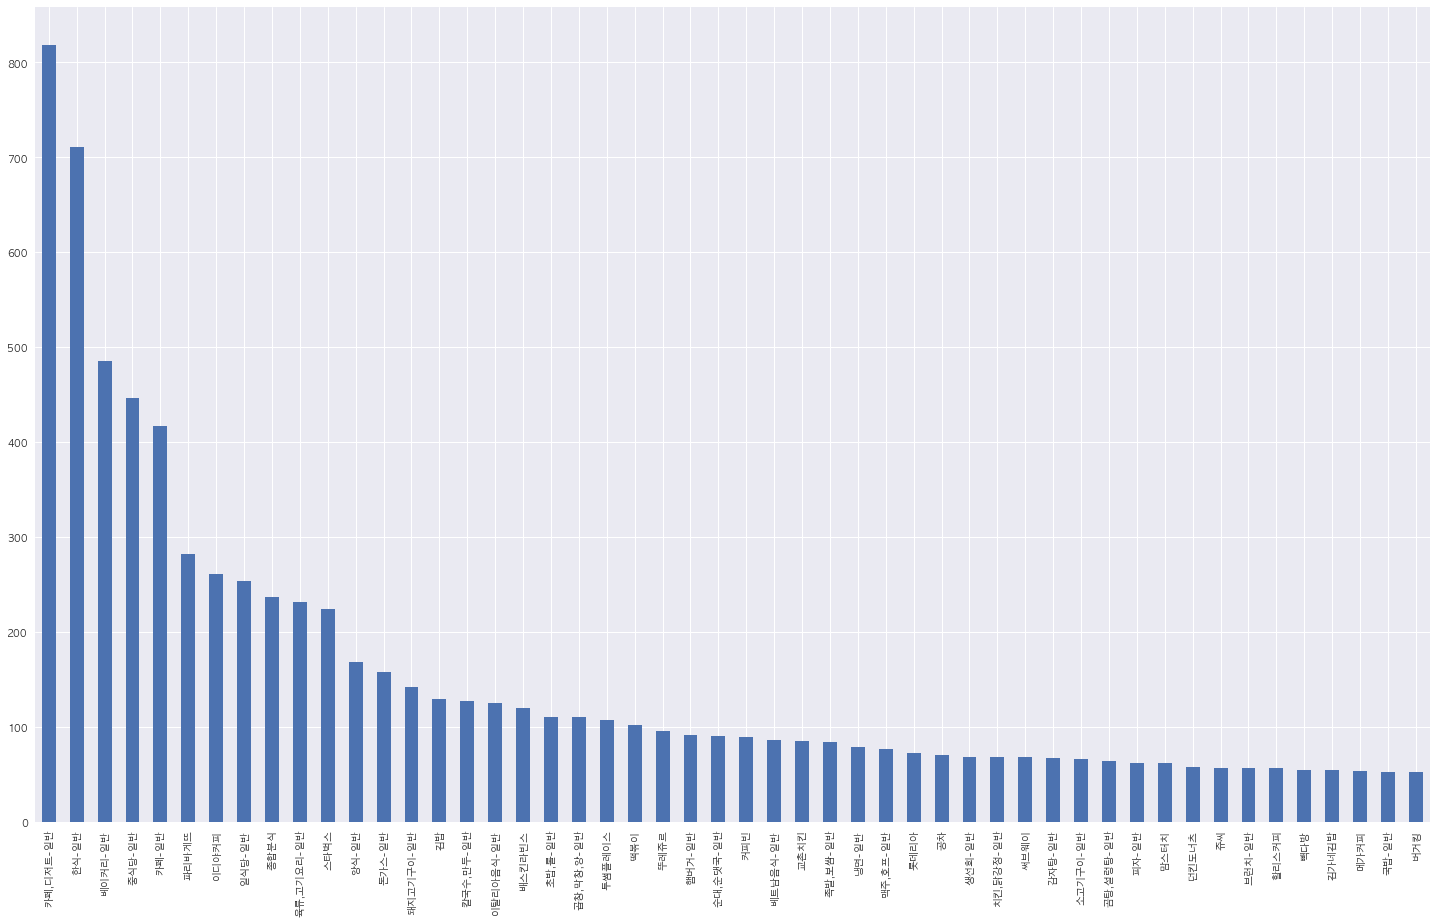

In [203]:
# place의 리뷰개수가 해당 카테고리의 리뷰 평균개수보다 많고, 리뷰 개수가 20개 이상인 place를 가지는 place.category의 분포도
plt.figure(figsize = (25,15))
place_review.loc[(place_review['isvalid'] >= 1) & (place_review['review.count_x'] > 20), 'place.category'].value_counts().sort_values(ascending = False)[:50].plot(kind = 'bar')

In [216]:
temp = place_review.loc[(place_review['isvalid'] >= 1) & (place_review['review.count_x'] > 20)]

In [219]:
temp

,place.category,place.name,place.id,review.count_x,avg.review_x,isvalid,review.count_y,place.count,avg.review_y
27,"아귀찜,해물찜-일반",옛날집낙원아구찜,11679292,22,335,2.998772,2443,333,7.336336
28,"아귀찜,해물찜-일반",통나무식당 낙원본점,11679479,24,335,3.271388,2443,333,7.336336
41,"아귀찜,해물찜-일반",알부자알요리,12018058,67,335,9.132624,2443,333,7.336336
85,"아귀찜,해물찜-일반",해다원해물찜,1385905638,21,335,2.862464,2443,333,7.336336
102,"아귀찜,해물찜-일반",개나리아구찜 송파점,1505588868,27,335,3.680311,2443,333,7.336336
...,...,...,...,...,...,...,...,...,...
104958,폴리스,폴리스 파미에스테이션점,575510498,52,4,1.072165,194,4,48.500000
104959,폴리스,폴리스 광화문D타워점,909606899,55,4,1.134021,194,4,48.500000
104978,95도씨카페,95도씨카페 가산벽산6차점,38473337,24,3,1.674419,43,3,14.333333
104989,고수닭갈비,고수닭갈비 강남2호점,41986281,24,1,1.000000,24,1,24.000000


In [224]:
# place가 서울이며, place의 리뷰개수가 해당 카테고리의 리뷰 평균개수보다 많고, 리뷰 개수가 20개 이상인 place의 모든 리뷰는 679278개
rv_sel_select = pd.merge(rv_sel, temp, on = 'place.id', how = 'inner')

In [300]:
rv_sel_select

,rating,body,visitCount,viewCount,thumbnail,status,media,id,__typename,idno,...,isseoul,media_count,place.category_y,place.name_y,review.count_x,avg.review_x,isvalid,review.count_y,place.count,avg.review_y
0,4.5,,2,1,none,published,[],5ec7ec658160f100109a8368,Review,4TXey,...,1,none,스타벅스,스타벅스 보라매공원R점,237,529,1.522434,82039,527,155.671727
1,5.0,none,1,0,none,published,[],5ca2307a76b53c9d7cd7666e,Review,4TXey,...,1,none,스타벅스,스타벅스 보라매공원R점,237,529,1.522434,82039,527,155.671727
2,5.0,none,1,0,none,published,[],5d14eaa963951f37e4243fa5,Review,awWC,...,1,none,스타벅스,스타벅스 보라매공원R점,237,529,1.522434,82039,527,155.671727
3,5.0,,1,1,none,published,[],5e69024bf896230011648a61,Review,1Unzg,...,1,none,스타벅스,스타벅스 보라매공원R점,237,529,1.522434,82039,527,155.671727
4,5.0,,1,1,none,published,[],5e4f98b95543c700113e18e7,Review,LRVl,...,1,none,스타벅스,스타벅스 보라매공원R점,237,529,1.522434,82039,527,155.671727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679273,5.0,매일 한잔쓰 ~~~,5,1,none,published,[],5e733e7d4cda9600101697d7,Review,usfH,...,1,0,카페-일반,착한커피 구로디지털점,28,4418,3.268575,37658,4396,8.566424
679274,5.0,매일 한잔쓰 ~~~,4,1,none,published,[],5e733e3099bc8e0012926f7f,Review,usfH,...,1,0,카페-일반,착한커피 구로디지털점,28,4418,3.268575,37658,4396,8.566424
679275,5.0,굿굿 !~~~~~~!!!!,3,1,none,published,[],5e70d6395eddb700123ce401,Review,usfH,...,1,0,카페-일반,착한커피 구로디지털점,28,4418,3.268575,37658,4396,8.566424
679276,5.0,착한 커피 착한 가격 ~ 매일 한잔 좋소 ~~!!,2,2,none,published,[],5e70d616d0d9540010dcf34b,Review,usfH,...,1,0,카페-일반,착한커피 구로디지털점,28,4418,3.268575,37658,4396,8.566424


In [228]:
# 그런데 visitCount가 높은게 있다.
# 즉, 한사람이 한 place를 여러번 방문했다는 것을 의미
rv_sel_select['visitCount'].sort_values()

530190      0
425926      0
246194      0
425923      0
425919      0
         ... 
590187    156
590186    157
590185    158
590184    159
590183    160
Name: visitCount, Length: 679278, dtype: int64

In [238]:
# user는 35451명
rv_sel_select['idno'].nunique()

35451

In [290]:
# 한 플레이스 여러번 방문한 user 중복 제거
rv_sel_select_duplicate = rv_sel_select.drop_duplicates(subset=['idno', 'place.id'])

In [291]:
rv_sel_select_duplicate['place.category_y'].value_counts().head(30)

스타벅스          34160
카페,디저트-일반     32140
한식-일반         20451
베이커리-일반       18930
카페-일반         13535
파리바게뜨         12698
중식당-일반        11986
일식당-일반         8532
종합분식           7178
육류,고기요리-일반     7059
배스킨라빈스         6814
투썸플레이스         6813
이디야커피          6678
양식-일반          6461
버거킹            6419
맥도날드           6099
돈가스-일반         5596
롯데리아           5310
이탈리아음식-일반      5021
칼국수,만두-일반      4992
햄버거-일반         4790
커피빈            4467
공차             4392
떡볶이            4385
돼지고기구이-일반      4369
써브웨이           4355
뚜레쥬르           4012
폴바셋            3862
초밥,롤-일반        3789
할리스커피          3608
Name: place.category_y, dtype: int64

In [292]:
rv_sel_select_duplicate['place.category_y'].nunique()

1198

In [297]:
pd.DataFrame(rv_sel_select_duplicate['place.category_y'].unique()).to_excel(os.path.join("..","..", "data","JS_08_category_check_franchise.xlsx"), index = False)